# Pandas及其應用

## 目錄
* ' axis ' 的方向
* Pandas 

  (1) DataFrames 的加加減減
  
  (2) 挑出我們要的資料
  
  (3) 加權/加總
  
  (4) 排序 
  
  (5) 刪掉一些列或行
  
  
* 自製dataframes
* 讀入真實世界的數據
* 爬蟲 : 把網頁資料從html上爬下來

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###  1 ' axis ' 的方向
e.g. axis = 0 , axis = 1

In [2]:
x = np.arange(10)

In [3]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

####  1.1 array的好處

(1)

In [4]:
x * 87 + 100

array([100, 187, 274, 361, 448, 535, 622, 709, 796, 883])

(2)

In [5]:
x = np.arange(1, 5, 0.2)

In [6]:
x

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

(3)

In [7]:
x=np.arange(10)

In [8]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
A = x.reshape(2, 5)

In [10]:
A

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

(4)

In [11]:
A.sum()

45

#### 往列的方向相加

In [12]:
A.sum(axis = 0)

array([ 5,  7,  9, 11, 13])

#### 往行的方向相加

In [13]:
A.sum(axis = 1)

array([10, 35])

### 2  Pandas 
* 有兩種資料形式，通常使用dataframes的形式

#### 讀取老師幫我們用好的data (不知道哪裡來的學測成績)

In [80]:
df = pd.read_csv("http://bit.ly/gradescsv")

In [81]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


In [82]:
df.tail()

,姓名,國文,英文,數學,自然,社會
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15
99,農揚勇,9,11,12,12,10


#### 與list的差別在於此處有索引

#### (1)

In [83]:
df["數學"]

0     15
1     10
2      8
3      8
4     14
      ..
95     9
96    14
97    11
98     8
99    12
Name: 數學, Length: 100, dtype: int64

In [84]:
df["數學"].mean()

11.57

#### (2)

In [85]:
df.數學 

0     15
1     10
2      8
3      8
4     14
      ..
95     9
96    14
97    11
98     8
99    12
Name: 數學, Length: 100, dtype: int64

In [86]:
df.數學 * 10

0     150
1     100
2      80
3      80
4     140
     ... 
95     90
96    140
97    110
98     80
99    120
Name: 數學, Length: 100, dtype: int64

#### (3)

In [87]:
df[["數學", "英文"]].head()

,數學,英文
0,15,10
1,10,10
2,8,15
3,8,10
4,14,12


#### (4) 與plot配合得很好

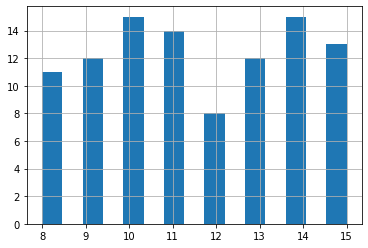

In [22]:
df.數學.hist(bins = 15)

In [23]:
df.數學.std()

2.310516143307562

#### (5) 每種統計量都算

In [24]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


#### (6)相關係數

In [25]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


### 2.1 DataFrames 的加加減減

#### (1) 新增加一個欄位

In [26]:
df["沒用"] = 1 #預設質

In [27]:
df.head()

,姓名,國文,英文,數學,自然,社會,沒用
0,劉俊安,9,10,15,10,13,1
1,胡玉華,10,10,10,8,9,1
2,黃淑婷,13,15,8,11,14,1
3,陳上紫,10,10,8,9,14,1
4,崔靜成,13,12,14,12,13,1


#### (2) 刪除一個欄位
* axis=1:因為是刪除那一行

In [28]:
df.drop("沒用", axis=1)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


#### 並沒有改掉原本的dataframes

In [29]:
df.head()

,姓名,國文,英文,數學,自然,社會,沒用
0,劉俊安,9,10,15,10,13,1
1,胡玉華,10,10,10,8,9,1
2,黃淑婷,13,15,8,11,14,1
3,陳上紫,10,10,8,9,14,1
4,崔靜成,13,12,14,12,13,1


####  真的要刪除
* inplace=True : 因為真的要刪除

In [30]:
df.drop("沒用", axis=1, inplace=True)

In [31]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


### 2.2 挑出我們要的資料

#### 取前5位

In [32]:
dfs = df[0:5]

In [88]:
print(dfs)

    姓名  國文  英文  數學  自然  社會
0  劉俊安   9  10  15  10  13
1  胡玉華  10  10  10   8   9
2  黃淑婷  13  15   8  11  14
3  陳上紫  10  10   8   9  14
4  崔靜成  13  12  14  12  13


### 2.3 加權/加總

#### 加權

In [33]:
df["加權"] = df.數學 * 2 + df.自然 * 3 

In [34]:
df.head()

,姓名,國文,英文,數學,自然,社會,加權
0,劉俊安,9,10,15,10,13,60
1,胡玉華,10,10,10,8,9,44
2,黃淑婷,13,15,8,11,14,49
3,陳上紫,10,10,8,9,14,43
4,崔靜成,13,12,14,12,13,64


#### 加總 
 * loc : 把我要求的資料拿下來，要給行還有列

In [35]:
df["總分"] = df.loc[:, "國文":"數學"].sum(axis = 1)

In [36]:
df.head()

,姓名,國文,英文,數學,自然,社會,加權,總分
0,劉俊安,9,10,15,10,13,60,34
1,胡玉華,10,10,10,8,9,44,30
2,黃淑婷,13,15,8,11,14,49,36
3,陳上紫,10,10,8,9,14,43,28
4,崔靜成,13,12,14,12,13,64,39


### 2.4 排序 
* ascending = False : 總分由高排序到低

#### 1 比總分

In [37]:
df.sort_values(by = "總分", ascending = False).head()

,姓名,國文,英文,數學,自然,社會,加權,總分
73,吳志遠,13,15,15,8,8,54,43
57,胡淳茜,12,15,14,13,11,67,41
48,陳怡婷,15,14,12,9,15,51,41
65,謝雅琳,13,14,13,12,9,62,40
25,蔡亦瑄,13,13,14,13,12,67,40


#### 2 先比加權，若加權一樣再比總分

In [38]:
df.sort_values(by=["加權", "總分"], ascending = False)

,姓名,國文,英文,數學,自然,社會,加權,總分
68,劉麗芬,8,14,14,14,14,70,36
83,李士賢,10,14,15,13,13,69,39
37,曾怡君,11,12,15,13,14,69,38
76,周育霖,9,12,15,13,12,69,36
79,宣宣士,9,10,12,15,13,69,31
...,...,...,...,...,...,...,...,...
41,曲秀芬,14,14,8,9,15,43,36
98,李明威,15,9,8,9,15,43,32
3,陳上紫,10,10,8,9,14,43,28
32,林建亨,9,11,8,8,11,40,28


In [39]:
df_sorted = df.sort_values(by = ["加權", "總分"], ascending = False)

In [40]:
df_sorted.head()

,姓名,國文,英文,數學,自然,社會,加權,總分
68,劉麗芬,8,14,14,14,14,70,36
83,李士賢,10,14,15,13,13,69,39
37,曾怡君,11,12,15,13,14,69,38
76,周育霖,9,12,15,13,12,69,36
79,宣宣士,9,10,12,15,13,69,31


#### 3 index變成名次

In [89]:
len(df_sorted)

100

In [41]:
df_sorted.index=range(1, 101)

In [42]:
df_sorted.head()

,姓名,國文,英文,數學,自然,社會,加權,總分
1,劉麗芬,8,14,14,14,14,70,36
2,李士賢,10,14,15,13,13,69,39
3,曾怡君,11,12,15,13,14,69,38
4,周育霖,9,12,15,13,12,69,36
5,宣宣士,9,10,12,15,13,69,31


#### 4 過濾出數學滿級分的

In [43]:
df_sorted[df_sorted.數學 == 15]

,姓名,國文,英文,數學,自然,社會,加權,總分
2,李士賢,10,14,15,13,13,69,39
3,曾怡君,11,12,15,13,14,69,38
4,周育霖,9,12,15,13,12,69,36
15,張雅彬,10,11,15,12,8,66,36
17,段冠廷,9,8,15,12,15,66,32
36,詹威德,12,13,15,10,14,60,40
37,林哲法,14,9,15,10,14,60,38
39,陳竹伯,10,12,15,10,14,60,37
40,芮秋辛,11,10,15,10,8,60,36
41,劉俊安,9,10,15,10,13,60,34


#### 5 過濾出數學滿級分的且英文也滿級分的

In [44]:
df_sorted[(df_sorted.數學 == 15) & (df_sorted.英文 == 15)]

,姓名,國文,英文,數學,自然,社會,加權,總分
53,吳志遠,13,15,15,8,8,54,43


#### 6 過濾出數學滿級分的或英文也滿級分的

In [45]:
df_sorted[(df_sorted.數學 == 15) | (df_sorted.英文 == 15)]

,姓名,國文,英文,數學,自然,社會,加權,總分
2,李士賢,10,14,15,13,13,69,39
3,曾怡君,11,12,15,13,14,69,38
4,周育霖,9,12,15,13,12,69,36
10,胡淳茜,12,15,14,13,11,67,41
15,張雅彬,10,11,15,12,8,66,36
17,段冠廷,9,8,15,12,15,66,32
21,李正偉,11,15,11,14,15,64,37
24,施雅鈴,13,15,12,13,13,63,40
25,陳怡潔,15,15,9,15,11,63,39
32,林意珍,9,15,11,13,9,61,35


### 2.5 刪掉一些列或行

In [46]:
df_sorted.drop("總分", axis = 1, inplace = True)

In [47]:
df_sorted.head()

,姓名,國文,英文,數學,自然,社會,加權
1,劉麗芬,8,14,14,14,14,70
2,李士賢,10,14,15,13,13,69
3,曾怡君,11,12,15,13,14,69
4,周育霖,9,12,15,13,12,69
5,宣宣士,9,10,12,15,13,69


#### e.g. 刪掉第五位

#### method 1

In [48]:
#drop(5) : 預設
df_sorted.drop(5).head()

,姓名,國文,英文,數學,自然,社會,加權
1,劉麗芬,8,14,14,14,14,70
2,李士賢,10,14,15,13,13,69
3,曾怡君,11,12,15,13,14,69
4,周育霖,9,12,15,13,12,69
6,俞志峰,9,14,13,14,15,68


#### method 2

In [49]:
df_sorted.drop(index=5)

,姓名,國文,英文,數學,自然,社會,加權
1,劉麗芬,8,14,14,14,14,70
2,李士賢,10,14,15,13,13,69
3,曾怡君,11,12,15,13,14,69
4,周育霖,9,12,15,13,12,69
6,俞志峰,9,14,13,14,15,68
...,...,...,...,...,...,...,...
96,曲秀芬,14,14,8,9,15,43
97,李明威,15,9,8,9,15,43
98,陳上紫,10,10,8,9,14,43
99,林建亨,9,11,8,8,11,40


#### e.g. 刪掉第一位
####  先看看我們想刪掉的同學的index是多少

In [91]:
df_sorted[df_sorted.姓名 == "劉麗芬"].index

Int64Index([1], dtype='int64')

In [51]:
df_sorted.drop(df_sorted[df_sorted.姓名 == "劉麗芬"].index)

,姓名,國文,英文,數學,自然,社會,加權
2,李士賢,10,14,15,13,13,69
3,曾怡君,11,12,15,13,14,69
4,周育霖,9,12,15,13,12,69
5,宣宣士,9,10,12,15,13,69
6,俞志峰,9,14,13,14,15,68
...,...,...,...,...,...,...,...
96,曲秀芬,14,14,8,9,15,43
97,李明威,15,9,8,9,15,43
98,陳上紫,10,10,8,9,14,43
99,林建亨,9,11,8,8,11,40


#### e.g. 刪掉國文<8分的刪除

#### method 1 

In [52]:
S = df_sorted[df_sorted.國文 < 8].index

In [53]:
df_sorted.drop(S)

,姓名,國文,英文,數學,自然,社會,加權
1,劉麗芬,8,14,14,14,14,70
2,李士賢,10,14,15,13,13,69
3,曾怡君,11,12,15,13,14,69
4,周育霖,9,12,15,13,12,69
5,宣宣士,9,10,12,15,13,69
...,...,...,...,...,...,...,...
96,曲秀芬,14,14,8,9,15,43
97,李明威,15,9,8,9,15,43
98,陳上紫,10,10,8,9,14,43
99,林建亨,9,11,8,8,11,40


#### method 2

In [54]:
df_sorted[df_sorted.國文>8]

,姓名,國文,英文,數學,自然,社會,加權
2,李士賢,10,14,15,13,13,69
3,曾怡君,11,12,15,13,14,69
4,周育霖,9,12,15,13,12,69
5,宣宣士,9,10,12,15,13,69
6,俞志峰,9,14,13,14,15,68
...,...,...,...,...,...,...,...
96,曲秀芬,14,14,8,9,15,43
97,李明威,15,9,8,9,15,43
98,陳上紫,10,10,8,9,14,43
99,林建亨,9,11,8,8,11,40


### 3 自製dataframes

#### step 1 創造dataframes
#### (1)

In [55]:
mydata = np.random.randint(1, 10, 10).reshape(2, 5)

In [56]:
mydata

array([[7, 9, 7, 5, 9],
       [5, 2, 6, 4, 8]])

In [57]:
df1 = pd.DataFrame(mydata)

In [58]:
df1

,0,1,2,3,4
0,7,9,7,5,9
1,5,2,6,4,8


#### 設定欄位名

In [59]:
df1.columns = list('ABCDE')

In [60]:
df1

,A,B,C,D,E
0,7,9,7,5,9
1,5,2,6,4,8


#### (2)

In [61]:
mydata2 = np.random.randint(1, 10, 15).reshape(3, 5)

In [62]:
df2 = pd.DataFrame(mydata2, columns=list('ABCDE'))

In [63]:
df2

,A,B,C,D,E
0,7,4,2,8,7
1,7,4,2,4,4
2,6,4,3,1,5


#### step 2 合併df1, df2

#### 沿列方向合併

In [64]:
pd.concat([df1, df2])

,A,B,C,D,E
0,7,9,7,5,9
1,5,2,6,4,8
0,7,4,2,8,7
1,7,4,2,4,4
2,6,4,3,1,5


#### 沿行方向合併

In [65]:
pd.concat([df1, df2], axis = 1)

,A,B,C,D,E,A,B,C,D,E
0,7.0,9.0,7.0,5.0,9.0,7,4,2,8,7
1,5.0,2.0,6.0,4.0,8.0,7,4,2,4,4
2,NaN,NaN,NaN,NaN,NaN,6,4,3,1,5


### 4 讀入真實世界的數據

#### 讀入一份酒的資料
* 數據集去uci machine learning找 !

In [66]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')

In [95]:
len(df)

100

#### 它把第一列的東西讀錯

In [67]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


#### 我們幫它把欄位名補上

In [68]:
column_names = "Class, Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Prolin".split(',')

In [70]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = column_names)

In [71]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Prolin
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 5 爬蟲 : 把網頁資料從html上爬下來
#### 從yahoo上讀入一份半導體股票的資料
* 此處是由於資料呈現表格狀所以可以直接這樣寫
* encoding='big5' : 告訴它本來的網頁是大五碼編法，否則資料呈現亂數

In [72]:
df_tmp = pd.read_html('https://tw.stock.yahoo.com/s/list.php?c=%A5b%BE%C9%C5%E9&rr=0.82697700%201596367057', encoding='big5')

In [97]:
#print(df_tmp)

#### 5張表格

In [73]:
len(df_tmp)

5

In [74]:
df = df_tmp[2]

In [75]:
df.head()

,選擇,股票代號,時間,成交,買進,賣出,漲跌,張數,昨收,開盤,最高,最低
0,NaN,2302 麗正,13:23,8.99,8.96,8.99,△0.03,149,8.96,8.98,9.05,8.95
1,NaN,2303 聯電,14:30,24.90,24.85,24.90,△0.35,273883,24.55,24.45,25.60,24.00
2,NaN,2329 華泰,14:30,11.90,11.85,11.90,△0.20,2500,11.70,11.70,11.95,11.70
3,NaN,2330 台積電,14:30,429.00,428.50,429.00,△3.5,47121,425.50,430.50,433.50,426.00
4,NaN,2337 旺宏,14:30,31.00,31.00,31.05,△0.20,21908,30.80,30.95,31.30,30.85


#### 去除選擇那行

In [76]:
df.drop('選擇', axis=1, inplace=True)

In [77]:
df.head()

,股票代號,時間,成交,買進,賣出,漲跌,張數,昨收,開盤,最高,最低
0,2302 麗正,13:23,8.99,8.96,8.99,△0.03,149,8.96,8.98,9.05,8.95
1,2303 聯電,14:30,24.90,24.85,24.90,△0.35,273883,24.55,24.45,25.60,24.00
2,2329 華泰,14:30,11.90,11.85,11.90,△0.20,2500,11.70,11.70,11.95,11.70
3,2330 台積電,14:30,429.00,428.50,429.00,△3.5,47121,425.50,430.50,433.50,426.00
4,2337 旺宏,14:30,31.00,31.00,31.05,△0.20,21908,30.80,30.95,31.30,30.85


#### ???自己找資料爬蟲